# Chessboard

On a 8x8 chessboard some of the squares are marked as available and some as unavailable. <br>
This information is given to you in a form of a numpy array which contains 1 in unavailable cells
and 0 everywhere else. <br>Both upper left corner and bottom right corner are available. <br>You need
to find the length of the shortest path from one corner to another which only passes through
available cells or return -1 if such path does not exist.<br> Explain the idea of the algorithm or
write the code in Python.


## Reality --> computer input --> mathematic representation

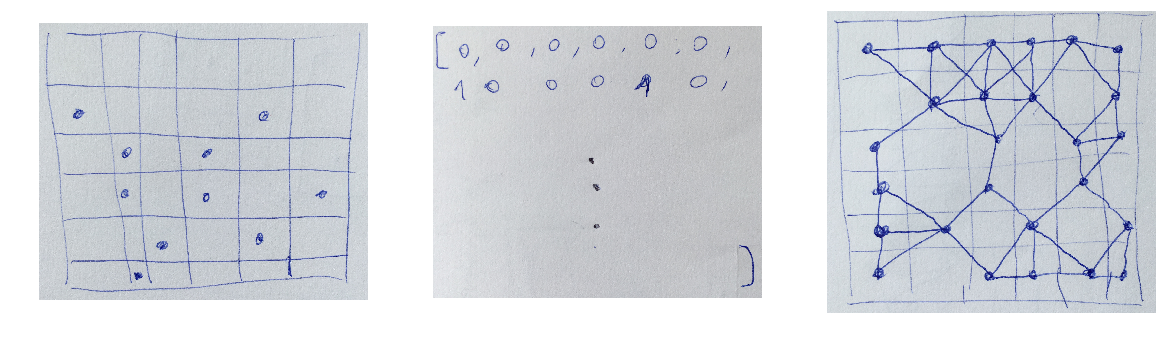

In [2]:
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 20, 40
fig, axes = plt.subplots(1, 3)
for idx,ax in enumerate(axes):
    img = plt.imread(f"images/chess_{idx}.png")
    ax.imshow(img)
    ax.axis('off')

## Import

In [3]:
# Import
import numpy as np
from random import shuffle
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

## Define parameters

In [4]:
start_point = (0,0)
end_point = (7,7)
nb_pieces_in_a_chess_game = 32
nb_squares_in_a_chess_game = 64
length_side = int(np.sqrt(nb_squares_in_a_chess_game))
# The worse path is go on each cells
infinity = nb_squares_in_a_chess_game + 1

## Define square class

In [5]:
class Square:        
    def __init__(self,x_y,chessboard):
        # Define coordinate of the square
        self.x_y = x_y
        self.x = x_y[0]
        self.y = x_y[1]
        # the initial length is set to infinity for each square unless it is the starting square
        if x_y == start_point:
            self.length = 0
        else:
            self.length = infinity
            
        # A square on the chess "knows" the chess, it's living on
        self.squares_available = chessboard.squares_coordinate_available
        self.get_neighbourhood()
        
    def get_neighbourhood(self):
        """
        init the neighbours for this square in such a chessboard
        """
        neighbourhood = []
        # This simplicity in the graphs structure allow to quickly consider different
        # way of navigation (straight line, chess knight moves ...)
        for deplace_x in (0,-1,+1):
            for deplace_y in (0,-1,+1):
                if deplace_x == 0 and deplace_y == 0:
                    pass
                else:
                    x_neighbour = self.x + deplace_x
                    y_neighbour = self.y + deplace_y
                    if (x_neighbour,y_neighbour) in self.squares_available:
                        neighbourhood.append((x_neighbour,y_neighbour))
        self.neighbourhood = neighbourhood

## Define Chessboard class

In [6]:
class Chessboard:
    def __init__(self,chessboard = np.zeros(nb_squares_in_a_chess_game)):
        self.chessboard = chessboard
        self.whos_before = {}
        self.convert()
        
    def convert(self):
        """
            Reshape the np_array to give the chess a grid structure
        """
        reshape = np.reshape(self.chessboard, (length_side, length_side))
        squares_coordinate_available = []
        for x, row in enumerate(reshape):
            for y, square_full in enumerate(row):
                if not bool(square_full):
                    coordinates = (x,y)
                    squares_coordinate_available.append(coordinates)
        self.squares_coordinate_available = squares_coordinate_available  
        
    def play_on(self):
        """
            A chess game is simulated on the chessboard
        """
        nb_remaining_chess_piece = np.random.randint(high = nb_pieces_in_a_chess_game, low = 1)
        #nb_remaining_chess_piece = 32
        nb_square_available = nb_squares_in_a_chess_game - 2 - nb_remaining_chess_piece
        chessboard = list(np.ones(nb_remaining_chess_piece)) + list(np.zeros(nb_square_available))
        shuffle(chessboard)
        chessboard.insert(0,0)
        chessboard.insert(nb_squares_in_a_chess_game,0)
        self.chessboard = chessboard
        self.convert()

    def create_squares(self):
        """
            Each available square of the chess is initialized to be an object of square class.
            The object is then stored in a dictionnary indexed by the coordinates
        """
        squares_available = {}
        for square_coordinate in self.squares_coordinate_available:
            squares_available[square_coordinate] = Square(square_coordinate,chessboard = self)
        self.squares_available = squares_available
        
    def get_square(self,x_y):
        """
            Method to get the square object at 
        """
        if x_y in self.squares_available:
            return(self.squares_available[x_y])
        else:
            return(f"You're trying to access a square that is not available. Coordinate : {x_y}")
    
    def get_min(self,unvisited_squares):
        """
            For the remaining unvisited_squares, get the coordinates of the square with the minimum length
        """
        minimum = infinity
        neighbour_min = -1
        for neighbour_coordinate in unvisited_squares:
            neighbour = self.get_square(neighbour_coordinate)
            if neighbour.length < minimum:
                minimum = neighbour.length
                neighbour_min = neighbour
        return(neighbour_min if neighbour_min == -1 else neighbour_min.x_y)
    
    def update_length(self,x_y_A, x_y_B):
        """
            The length is updated if a quicker path has been found
        """
        A = self.get_square(x_y_A)
        B = self.get_square(x_y_B)
        
        if B.length > A.length + 1:
            B.length = A.length + 1
            self.whos_before[x_y_B] = x_y_A
            
    def update_neighbourhood(self,x_y_A):
        """
            The length is updated for each neighbour B of A
        """
        for x_y_B in self.get_square(x_y_A).neighbourhood:
            self.update_length(x_y_A, x_y_B)
            
    def plot_chessboard(self,path = False):
        plt.close()
        nrows, ncols = length_side,length_side
        image = np.array([0 if square==1 else 1 for square in self.chessboard])
        image = image.reshape((nrows, ncols))
        row_labels = list(range(1,nrows+1)).reverse()
        col_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
        plt.matshow(image)
        if path and self.length_quickest_path >  0:
            for i in range(len(self.quickest_path)-1):
                x1,y1 = self.quickest_path[i]
                x2,y2 = self.quickest_path[i+1]
                plt.plot([y1,y2],[x1,x2], 'ro-')
        plt.xticks(range(ncols), col_labels)
        plt.yticks(range(nrows), row_labels)
        plt.show()
    def Dijkstra_solve(self):
        unvisited_square = list(self.squares_available.keys()).copy()
        while len(unvisited_square) >0:
            square = self.get_min(unvisited_square)
            if square == -1:
                break
            unvisited_square.remove(square)
            self.update_neighbourhood(square)
        quickest_path = []    
        if square != -1:
            result_dict = chess.whos_before
            current_square = end_point
            quickest_path.append(current_square)
            while current_square != start_point:
                current_square=result_dict[current_square]
                quickest_path.append(current_square)
            self.quickest_path = quickest_path
            self.length_quickest_path = len(quickest_path)
            print(f"The length of the quickest path is : {len(quickest_path) - 1}")
        else:
            print((square))
            self.length_quickest_path = square

In [7]:
# Given an empty chessboard
chessboard = Chessboard()
square = Square(x_y = (3,3),chessboard = chessboard)
# adding +1 or -1 to one or both of coordinates
square.neighbourhood

[(3, 2), (3, 4), (2, 3), (2, 2), (2, 4), (4, 3), (4, 2), (4, 4)]

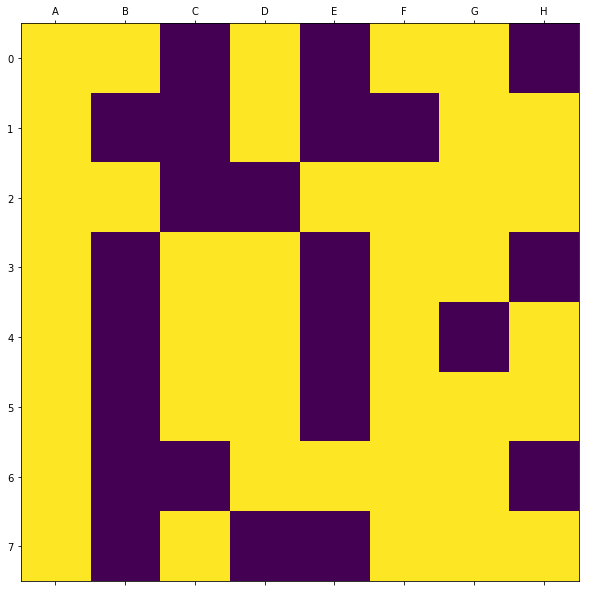

In [8]:
chess = Chessboard()
chess.play_on()
chess.create_squares()
chess.squares_available
chess.plot_chessboard()

## Dijkstra Algorithm

Dijkstra(chessboard,start_point) <br>
initialization <br>
Q = all squares available <br>
while Q is not an empty set <br>
->    current_square = find_min(Q) <br>
->    Q = Q \ current_square                        (ie unvisited squares)<br>
->    foreach square in the neighbourhood of current_square<br>
->    ->    update_length(square)<br>

The length of the quickest path is : 9


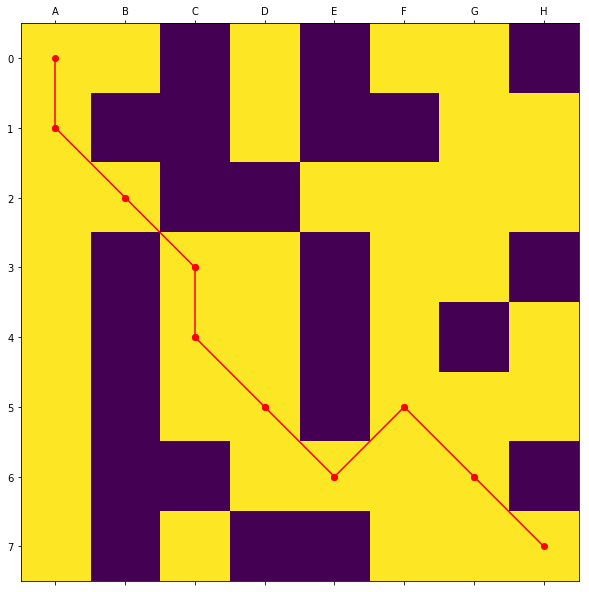

In [9]:
chess.Dijkstra_solve()
chess.plot_chessboard(path=True)